# Team 18 Final Project

In [60]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [24]:
#import csv
corn = pd.read_csv('Corn Commodity Data.csv')
corn.columns

Index(['Year', 'Quarter', 'Cash Price ($/bu)', 'Beginning Stocks (Million bu)',
       'Ending Stocks', 'Exports', 'Imports', 'Total Supply',
       'Total Disapearance', 'Total Domestic Use', 'Stocks-to-Use'],
      dtype='object')

In [26]:
newcorn = corn.rename(columns={"Cash Price ($/bu)": "CashPrice", "Beginning Stocks (Million bu)": "BeginningStocks"})
newcorn.head(3)

,Year,Quarter,CashPrice,BeginningStocks,Ending Stocks,Exports,Imports,Total Supply,Total Disapearance,Total Domestic Use,Stocks-to-Use
0,1980,Q1 Sep-Nov,3.027,2034.3,6595.9,687.867,0.292,8673.988,2078.088,1390.221,3.174023
1,1980,Q2 Dec-Feb,3.197,6595.9,4662.4,645.974,0.003,6595.903,1933.503,1287.529,2.411375
2,1980,Q3 Mar-May,3.244,4662.4,2773.5,613.953,0.046,4662.446,1888.946,1274.993,1.468279


In [28]:
#check size of data set
newcorn.shape

(164, 11)

In [36]:
#check null values of data set
newcorn.isna().sum()

Year                  0
Quarter               0
CashPrice             0
BeginningStocks       0
Ending Stocks         0
Exports               0
Imports               0
Total Supply          0
Total Disapearance    0
Total Domestic Use    0
Stocks-to-Use         0
dtype: int64

In [39]:
newcorn.corr()['CashPrice'].nlargest(8)

CashPrice             1.000000
Imports               0.638609
Year                  0.557962
Total Domestic Use    0.418328
Total Disapearance    0.401249
BeginningStocks       0.068771
Total Supply          0.037333
Exports              -0.057501
Name: CashPrice, dtype: float64

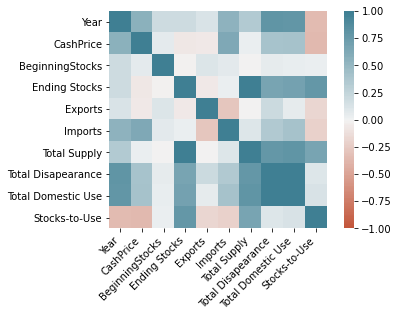

In [48]:
corr = newcorn[['Year', 'Quarter', 'CashPrice', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
x = newcorn[['Year', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use']]
y = newcorn[['CashPrice']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 3)

In [57]:
x = sm.add_constant(x)

In [58]:
LR = LinearRegression().fit(xtrain, ytrain)
LRtrainpred = LR.predict(xtrain)
LRtestpred = LR.predict(xtest)
LRtestpred

array([[2.86015636],
       [2.62351396],
       [2.30859103],
       [4.30383423],
       [4.54294517],
       [2.53027315],
       [2.88848244],
       [2.50125005],
       [2.79475813],
       [2.74740352],
       [2.27811134],
       [2.75151545],
       [2.09785055],
       [2.55666469],
       [3.79512663],
       [2.9267804 ],
       [2.67348143],
       [1.73739896],
       [1.61365521],
       [2.98655168],
       [3.17156247],
       [2.99422818],
       [4.18786763],
       [2.96276886],
       [2.78723852],
       [2.84547593],
       [3.29810432],
       [2.62465583],
       [3.16331022],
       [2.11113672],
       [2.70944132],
       [4.47331444],
       [3.79678959],
       [2.9182963 ],
       [2.70264333],
       [2.34785072],
       [2.79732708],
       [1.06908897],
       [2.33333116],
       [2.91327127],
       [1.29338002]])

In [63]:
LRtrainmse = metrics.mean_squared_error(ytrain, LRtrainpred)
LRtestmse = metrics.mean_squared_error(ytest, LRtestpred) 
print('LR train vs test MSE: ', LRtrainmse, 'vs', LRtestmse)
print('MSE difference:       ', (LRtrainmse-LRtestmse))

LR train vs test MSE:  0.6746804234872446 vs 0.6542461734752122
MSE difference:        0.020434250012032362
